# Standardisation vs Normalisation

## ➕ Comprendre les Différences Fondamentales

### 🟢 Standardisation

* Formule mathématique :


In [ ]:
X_standardized = (X - μ) / σ

* Où :

    - μ = moyenne de la feature

    - σ = écart-type de la feature

* Caractéristiques :

    - Centre les données autour de 0

    - Réduit l'échelle selon la dispersion

    - Ne modifie pas la forme de la distribution

    - Résistante aux outliers (dans une certaine mesure)

### 🟢 Normalisation (Min-Max Scaling)

* Formule mathématique :

In [ ]:
X_normalized = (X - X_min) / (X_max - X_min)

* Variante pour plage [-1, 1] :

In [ ]:
X_normalized = 2 * (X - X_min) / (X_max - X_min) - 1

* Caractéristiques :

    - Ramène toutes les valeurs entre [0, 1] ou [-1, 1]

    - Très sensible aux outliers

    - Préserve la distribution originale

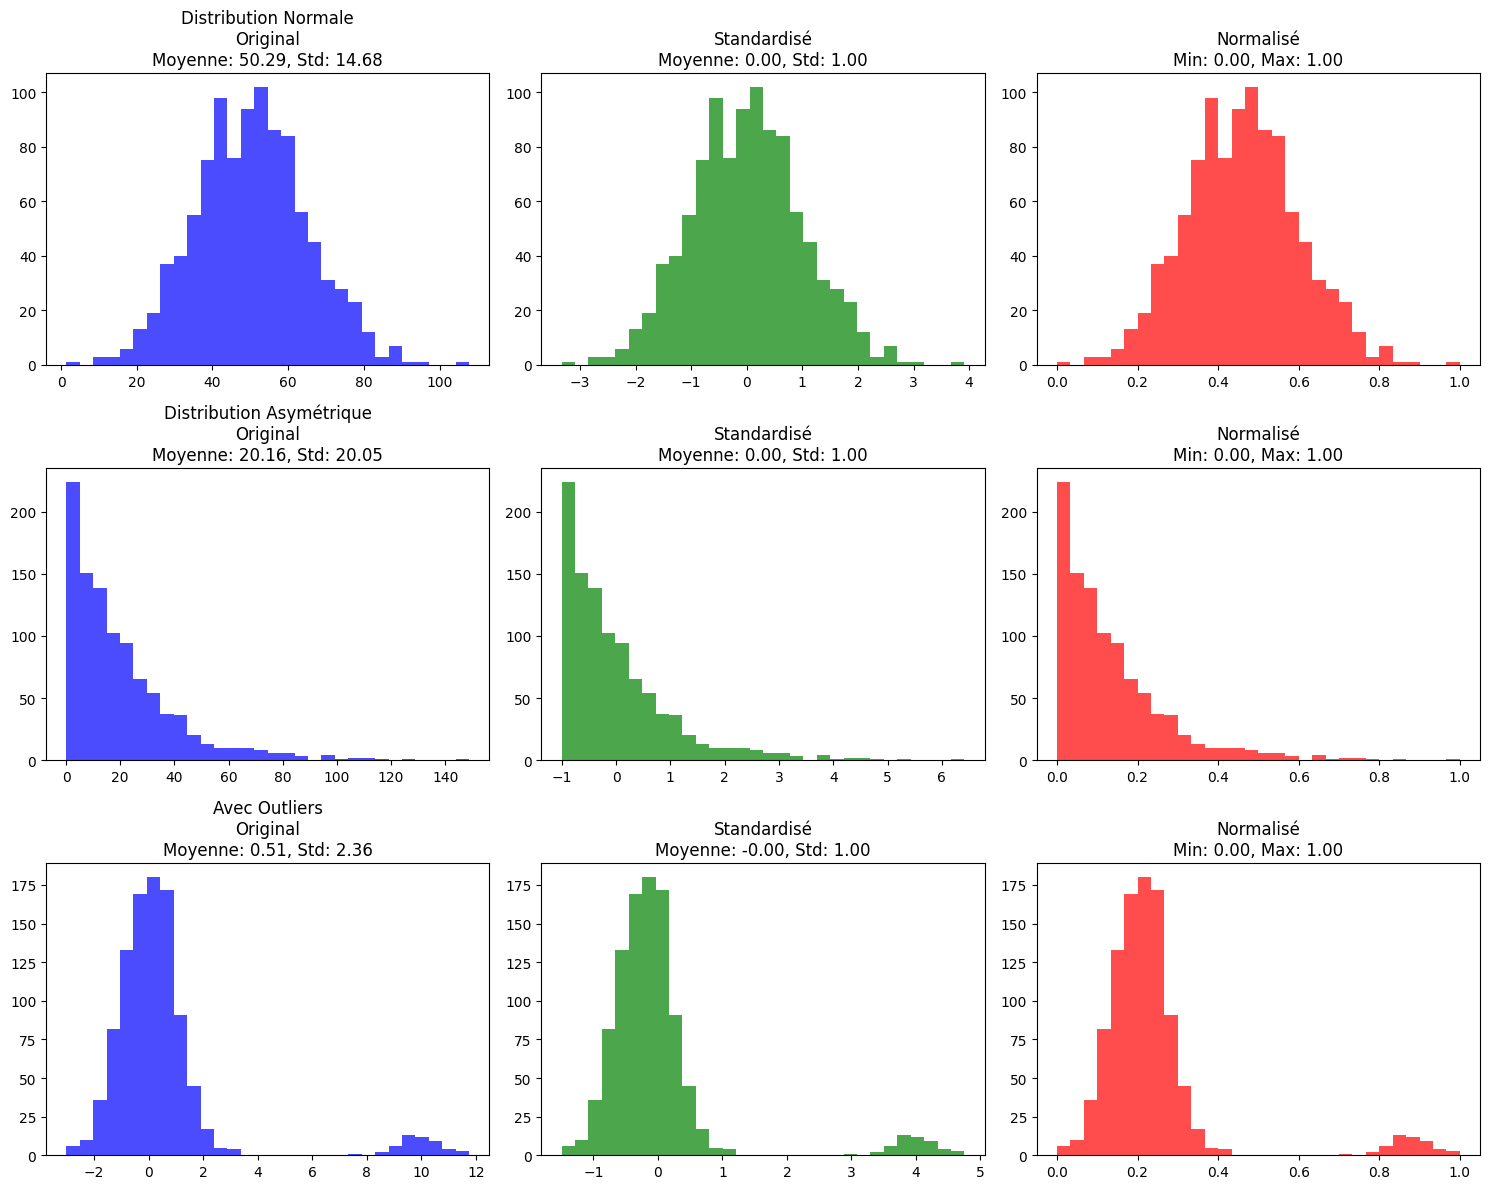

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs

# Création de données avec différentes caractéristiques
np.random.seed(42)

# Dataset 1: Distribution normale
X_normal = np.random.normal(50, 15, 1000)

# Dataset 2: Distribution asymétrique
X_skewed = np.random.exponential(scale=2, size=1000) * 10

# Dataset 3: Avec outliers
X_outliers = np.concatenate([
    np.random.normal(0, 1, 950),  # Données normales
    np.random.normal(10, 1, 50)   # Outliers
])

datasets = {
    'Distribution Normale': X_normal,
    'Distribution Asymétrique': X_skewed, 
    'Avec Outliers': X_outliers
}

# Application des transformations
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, (name, data) in enumerate(datasets.items()):
    data = data.reshape(-1, 1)
    
    # Original
    axes[i, 0].hist(data, bins=30, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'{name}\nOriginal\nMoyenne: {data.mean():.2f}, Std: {data.std():.2f}')
    
    # Standardisation
    scaler_std = StandardScaler()
    data_std = scaler_std.fit_transform(data)
    axes[i, 1].hist(data_std, bins=30, alpha=0.7, color='green')
    axes[i, 1].set_title(f'Standardisé\nMoyenne: {data_std.mean():.2f}, Std: {data_std.std():.2f}')
    
    # Normalisation
    scaler_minmax = MinMaxScaler()
    data_minmax = scaler_minmax.fit_transform(data)
    axes[i, 2].hist(data_minmax, bins=30, alpha=0.7, color='red')
    axes[i, 2].set_title(f'Normalisé\nMin: {data_minmax.min():.2f}, Max: {data_minmax.max():.2f}')

plt.tight_layout()
plt.show()

***
***

## ➕ Quand Utiliser Chaque Méthode ?

### 🟢 Utiliser la STANDARDISATION quand :

1. Algorithmes basés sur les distances

In [ ]:
# Exemple avec K-Means et KNN
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Sans standardisation → mauvaises performances
# Avec standardisation → bonnes performances

algorithms_distance_based = [
    'K-Means', 'K-Nearest Neighbors', 'SVM', 
    'PCA', 'LDA', 'DBSCAN'
]

2. Algorithmes avec régularisation

In [ ]:
# Régression Linéaire, Ridge, Lasso, Elastic Net
# Les pénalités L1/L2 sont sensibles à l'échelle

from sklearn.linear_model import Ridge, Lasso

# Standardisation nécessaire pour que la régularisation
# soit équitable entre toutes les features

3. Données avec distribution gaussienne

In [2]:
# Si vos données suivent approximativement une distribution normale
# La standardisation préserve cette propriété

4. Présence d'outliers modérés

In [ ]:
# La standardisation est moins sensible aux outliers
# que la normalisation

### 🟢 Utiliser la NORMALISATION quand :

1. Réseaux de neurones

In [ ]:
# Les fonctions d'activation (sigmoid, tanh) 
# fonctionnent mieux avec des entrées dans [0,1] ou [-1,1]

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalisation recommandée pour :
# - Couches d'entrée
# - Initialisation des poids
# - Convergence plus rapide

2. Images et vision par ordinateur

In [ ]:
# Les pixels sont naturellement dans [0, 255]
# Normalisation vers [0, 1] ou [-1, 1]

# Pour CNN (Convolutional Neural Networks)
# Normalisation des pixels : pixel / 255.0

3. Algorithmes qui nécessitent des données bornées

In [ ]:
algorithms_bounded = [
    'Neural Networks', 'Self-Organizing Maps',
    'Radial Basis Functions', 'Kernel PCA'
]

4. Absence d'outliers extrêmes

In [ ]:
# La normalisation est très sensible aux outliers
# À utiliser seulement si min/max sont représentatifs

***
***

## ➕ Étude de Cas Détaillée

### ✅ Cas 1 : Clustering avec K-Means

Échelles originales :
Feature 1 - Moyenne: -159.00, Std: 490.31
Feature 2 - Moyenne: 1.36, Std: 6.63
Original: Score de silhouette = 0.7721
Standardisé: Score de silhouette = 0.8482
Normalisé: Score de silhouette = 0.8488


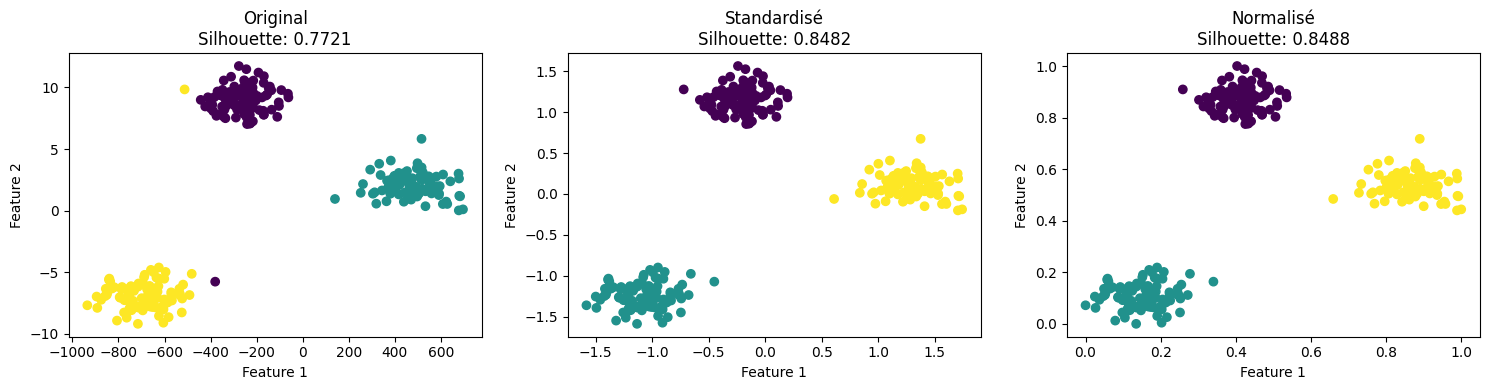

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Génération de données avec différentes échelles
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
# Modification artificielle des échelles
X[:, 0] = X[:, 0] * 100  # Première feature à grande échelle
X[:, 1] = X[:, 1] * 1    # Deuxième feature à petite échelle

print("Échelles originales :")
print(f"Feature 1 - Moyenne: {X[:, 0].mean():.2f}, Std: {X[:, 0].std():.2f}")
print(f"Feature 2 - Moyenne: {X[:, 1].mean():.2f}, Std: {X[:, 1].std():.2f}")

# Comparaison des méthodes
methods = {
    'Original': X,
    'Standardisé': StandardScaler().fit_transform(X),
    'Normalisé': MinMaxScaler().fit_transform(X)
}

results = {}
for name, X_transformed in methods.items():
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, labels)
    results[name] = score
    print(f"{name}: Score de silhouette = {score:.4f}")

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, X_transformed) in enumerate(methods.items()):
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_transformed)
    
    axes[i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='viridis')
    axes[i].set_title(f'{name}\nSilhouette: {results[name]:.4f}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

### ✅ Cas 2 : Régression avec Régularisation

In [4]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Données avec colinéarité et différentes échelles
X, y = make_blobs(n_samples=1000, n_features=5, centers=1, random_state=42)
X[:, 0] = X[:, 0] * 1000  # Grande échelle
X[:, 1] = X[:, 1] * 100   # Échelle moyenne  
X[:, 2] = X[:, 2] * 10    # Petite échelle

# Ajout de bruit
y = y + np.random.normal(0, 0.1, len(y))

# Comparaison des pipelines
pipelines = {
    'Sans preprocessing': Pipeline([('model', Ridge(alpha=1.0))]),
    'Avec Standardisation': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', Ridge(alpha=1.0))
    ]),
    'Avec Normalisation': Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', Ridge(alpha=1.0))
    ])
}

print("Performance de la régression Ridge :")
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: R² moyen = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Analyse des coefficients
ridge_std = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=1.0))])
ridge_std.fit(X, y)

ridge_minmax = Pipeline([('scaler', MinMaxScaler()), ('model', Ridge(alpha=1.0))])
ridge_minmax.fit(X, y)

print("\nCoefficients avec standardisation:", ridge_std.named_steps['model'].coef_)
print("Coefficients avec normalisation:", ridge_minmax.named_steps['model'].coef_)

Performance de la régression Ridge :
Sans preprocessing: R² moyen = -0.0183 (+/- 0.0218)
Avec Standardisation: R² moyen = -0.0183 (+/- 0.0218)
Avec Normalisation: R² moyen = -0.0176 (+/- 0.0203)

Coefficients avec standardisation: [ 1.12911277e-04  3.14142396e-05 -5.69978981e-03  2.11159300e-03
 -1.44603016e-03]
Coefficients avec normalisation: [ 0.00060555  0.00017484 -0.03510614  0.01321446 -0.00959803]


In [5]:
def choisir_preprocessing(X, algorithme, presence_outliers=True):
    """
    Guide de décision pour choisir entre standardisation et normalisation
    """
    decision_tree = {
        'distance_based': {
            'algorithms': ['KNN', 'K-Means', 'SVM', 'PCA', 'DBSCAN'],
            'recommendation': 'Standardisation'
        },
        'regularization': {
            'algorithms': ['Ridge', 'Lasso', 'ElasticNet', 'Regression'],
            'recommendation': 'Standardisation' 
        },
        'neural_networks': {
            'algorithms': ['MLP', 'CNN', 'RNN', 'Neural Network'],
            'recommendation': 'Normalisation'
        },
        'images': {
            'algorithms': ['Computer Vision', 'Image Processing'],
            'recommendation': 'Normalisation'
        }
    }
    
    for category, info in decision_tree.items():
        if algorithme in info['algorithms']:
            recommendation = info['recommendation']
            break
    else:
        recommendation = 'Standardisation'  # choix par défaut
    
    # Ajustement pour les outliers
    if presence_outliers and recommendation == 'Normalisation':
        print("⚠️  Attention: Normalisation sensible aux outliers")
        print("   Considérez la standardisation ou le traitement des outliers")
    
    return recommendation

# Exemples d'utilisation
algorithmes = ['KNN', 'Ridge', 'CNN', 'SVM', 'Regression']
for algo in algorithmes:
    choix = choisir_preprocessing(None, algo)
    print(f"{algo:12} → {choix}")

KNN          → Standardisation
Ridge        → Standardisation
⚠️  Attention: Normalisation sensible aux outliers
   Considérez la standardisation ou le traitement des outliers
CNN          → Normalisation
SVM          → Standardisation
Regression   → Standardisation
